In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('swedish_population_by_year_and_sex_1860-2022.csv')
year_columns = df.columns[2:]

melted_df = pd.melt(df, id_vars=['age', 'sex'], value_vars=year_columns, var_name='Year', value_name='Population')

print(melted_df)

        age    sex  Year  Population
0         0    men  1860       60589
1         0  women  1860       58837
2         1    men  1860       56001
3         1  women  1860       54833
4         2    men  1860       52502
...     ...    ...   ...         ...
36181   108  women  2022           8
36182   109    men  2022           0
36183   109  women  2022           1
36184  110+    men  2022           0
36185  110+  women  2022           3

[36186 rows x 4 columns]


In [3]:
# Change data types so comparison works
melted_df['Year'] = pd.to_numeric(melted_df['Year'])
melted_df['age'] = melted_df['age'].astype(str)
melted_df.loc[melted_df['age'] == '110+', 'age'] = '110'
melted_df['age'] = pd.to_numeric(melted_df['age'])

children = melted_df[melted_df['age'] <= 14].groupby('Year')['Population'].sum()
elderly = melted_df[melted_df['age'] >= 65].groupby('Year')['Population'].sum()
labor_force = melted_df[(melted_df['age'] >= 15) & (melted_df['age'] <= 64)].groupby('Year')['Population'].sum()
dependency_ratio = 100 * (children + elderly) / labor_force

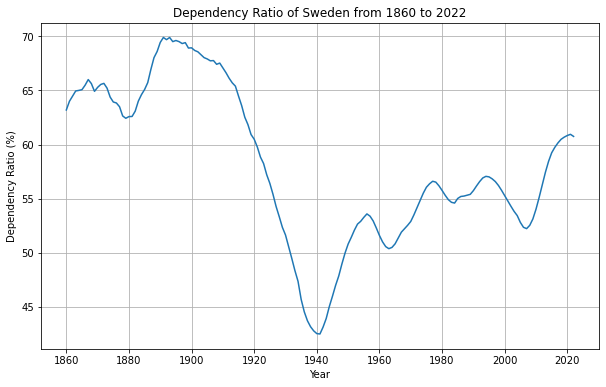

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(dependency_ratio.index, dependency_ratio.values)
plt.xlabel('Year')
plt.ylabel('Dependency Ratio (%)')
plt.title('Dependency Ratio of Sweden from 1860 to 2022')
plt.grid(True)
plt.show()

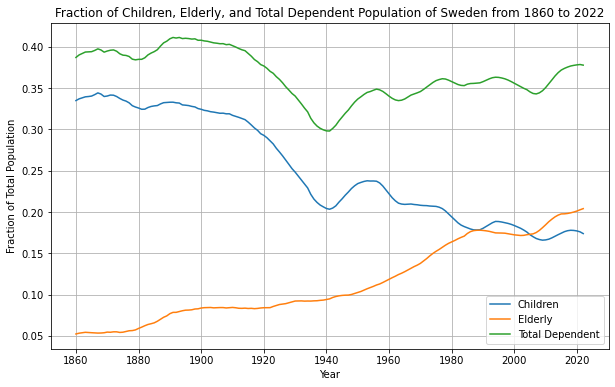

In [6]:
total_population = melted_df.groupby('Year')['Population'].sum()

children_fraction = children / total_population
elderly_fraction = elderly / total_population
dependent_fraction = (children + elderly) / total_population


plt.figure(figsize=(10, 6))
plt.plot(children_fraction.index, children_fraction.values, label='Children')
plt.plot(elderly_fraction.index, elderly_fraction.values, label='Elderly')
plt.plot(dependent_fraction.index, dependent_fraction.values, label='Total Dependent')
plt.xlabel('Year')
plt.ylabel('Fraction of Total Population')
plt.title('Fraction of Children, Elderly, and Total Dependent Population of Sweden from 1860 to 2022')
plt.legend()
plt.grid(True)
plt.show()